In [210]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix

from matplotlib import pyplot as plt
plt.style.use("fivethirtyeight")

pd.options.display.max_columns = 50
pd.options.display.max_rows = 100

In [211]:
# astros2016 = pd.read_csv("data/HOU2016.csv")
astros2017 = pd.read_csv("data/HOU2017.csv")
# astros2018 = pd.read_csv("data/HOU2018.csv")
# astros2019 = pd.read_csv("data/HOU2019.csv")
yankees2017 = pd.read_csv("data/NYY2017.csv")
# dodgers2017 = pd.read_csv("data/LAD2017.csv")
# redsox2017 = pd.read_csv("data/BOS2017.csv")


In [212]:
def boolhome(df):
    df.dropna(axis="index", how="all", inplace=True, subset=['Gtm'])
    df.rename(columns={"Unnamed: 3":"Home"}, inplace=True)
    df.replace({"Home":{"@": False, np.nan: True}}, inplace=True)
    df.drop("Unnamed: 0", axis=1, inplace=True)
    df.reset_index(drop=True, inplace=True)
    df['GmeSc'] = df['Opp. Starter (GmeSc)'].apply(lambda x: x[-3:-1])
    df['so/at'] = df['SO'] / df["AB"]
    df['bb/at'] = df['BB'] / df["AB"]
#     df['bbsum'] = df["BB"] + df['SO']
    #df['GmeSc'].apply(lambda x: x.astype(int))
    return df

In [213]:
astros2017df = boolhome(astros2017)

In [214]:
# astros2017df = boolhome(astros2017)
# astros2018df = boolhome(astros2018)
# astros2019df = boolhome(astros2019)
# astros2016df = boolhome(astros2016)
yankees2017df = boolhome(yankees2017)
# dodgers2017df = boolhome(dodgers2017)
# redsox2017df = boolhome(redsox2017)

In [215]:
columns = astros2017df.columns

In [216]:
# astros2017df['so/at'] = astros2017df['SO'] / astros2017df["AB"]
# astros2017df['bb/at'] = astros2017df['BB'] / astros2017df["AB"]
# astros2017df['bbsum'] = astros2017df["BB"] + astros2017df['SO']

In [217]:
astros2017df.head()

,Gtm,Date,Home,Opp,Rslt,PA,AB,R,H,2B,3B,HR,RBI,BB,IBB,SO,HBP,SH,SF,ROE,GDP,SB,CS,BA,OBP,SLG,OPS,LOB,#,Thr,Opp. Starter (GmeSc),GmeSc,so/at,bb/at
0,1.0,Apr 3,True,SEA,"W,3-0",30.0,27.0,3.0,6.0,0.0,0.0,2.0,3.0,1.0,0.0,6.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.222,0.241,0.444,0.686,3.0,10.0,R,F.Hernandez(55),55,0.222222,0.037037
1,2.0,Apr 4,True,SEA,"W,2-1",29.0,26.0,2.0,5.0,0.0,0.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,0.208,0.259,0.434,0.693,3.0,10.0,R,H.Iwakuma(55),55,0.115385,0.115385
2,3.0,Apr 5,True,SEA,"W,5-3",55.0,51.0,5.0,13.0,4.0,0.0,1.0,5.0,3.0,0.0,9.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.231,0.277,0.413,0.690,12.0,11.0,L,J.Paxton(72),72,0.176471,0.058824
3,4.0,Apr 6,True,SEA,"L,2-4",36.0,32.0,2.0,6.0,0.0,0.0,2.0,2.0,3.0,1.0,10.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.221,0.277,0.404,0.681,7.0,11.0,L,A.Miranda(50),50,0.312500,0.093750
4,5.0,Apr 7,True,KCR,"L,1-5",33.0,30.0,1.0,6.0,1.0,0.0,0.0,1.0,3.0,0.0,8.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.217,0.276,0.373,0.650,5.0,10.0,L,J.Vargas(61),61,0.266667,0.100000


In [218]:
astros2017df.info

<bound method DataFrame.info of        Gtm    Date   Home  Opp    Rslt    PA    AB     R     H   2B   3B   HR  \
0      1.0   Apr 3   True  SEA   W,3-0  30.0  27.0   3.0   6.0  0.0  0.0  2.0   
1      2.0   Apr 4   True  SEA   W,2-1  29.0  26.0   2.0   5.0  0.0  0.0  2.0   
2      3.0   Apr 5   True  SEA   W,5-3  55.0  51.0   5.0  13.0  4.0  0.0  1.0   
3      4.0   Apr 6   True  SEA   L,2-4  36.0  32.0   2.0   6.0  0.0  0.0  2.0   
4      5.0   Apr 7   True  KCR   L,1-5  33.0  30.0   1.0   6.0  1.0  0.0  0.0   
..     ...     ...    ...  ...     ...   ...   ...   ...   ...  ...  ...  ...   
157  158.0  Sep 27  False  TEX  W,12-2  45.0  43.0  12.0  16.0  3.0  0.0  3.0   
158  159.0  Sep 28  False  BOS  W,12-2  50.0  44.0  12.0  17.0  4.0  0.0  3.0   
159  160.0  Sep 29  False  BOS   W,3-2  36.0  33.0   3.0   6.0  1.0  0.0  1.0   
160  161.0  Sep 30  False  BOS   L,3-6  37.0  33.0   3.0   8.0  1.0  0.0  1.0   
161  162.0   Oct 1  False  BOS   W,4-3  38.0  33.0   4.0   8.0  2.0  0.0  0.0

In [219]:
astros2017df.head()

,Gtm,Date,Home,Opp,Rslt,PA,AB,R,H,2B,3B,HR,RBI,BB,IBB,SO,HBP,SH,SF,ROE,GDP,SB,CS,BA,OBP,SLG,OPS,LOB,#,Thr,Opp. Starter (GmeSc),GmeSc,so/at,bb/at
0,1.0,Apr 3,True,SEA,"W,3-0",30.0,27.0,3.0,6.0,0.0,0.0,2.0,3.0,1.0,0.0,6.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.222,0.241,0.444,0.686,3.0,10.0,R,F.Hernandez(55),55,0.222222,0.037037
1,2.0,Apr 4,True,SEA,"W,2-1",29.0,26.0,2.0,5.0,0.0,0.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,0.208,0.259,0.434,0.693,3.0,10.0,R,H.Iwakuma(55),55,0.115385,0.115385
2,3.0,Apr 5,True,SEA,"W,5-3",55.0,51.0,5.0,13.0,4.0,0.0,1.0,5.0,3.0,0.0,9.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.231,0.277,0.413,0.690,12.0,11.0,L,J.Paxton(72),72,0.176471,0.058824
3,4.0,Apr 6,True,SEA,"L,2-4",36.0,32.0,2.0,6.0,0.0,0.0,2.0,2.0,3.0,1.0,10.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.221,0.277,0.404,0.681,7.0,11.0,L,A.Miranda(50),50,0.312500,0.093750
4,5.0,Apr 7,True,KCR,"L,1-5",33.0,30.0,1.0,6.0,1.0,0.0,0.0,1.0,3.0,0.0,8.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.217,0.276,0.373,0.650,5.0,10.0,L,J.Vargas(61),61,0.266667,0.100000


In [226]:
# astros2017df.dropna(axis="index", how="all", inplace=True)

In [227]:
#astros2017df.head()

In [228]:
#astros2017df.tail()

In [229]:
#astros2017df.describe()

In [230]:
#astros2017df.OBP
#yankees2017df.OBP

In [231]:
# #astros2017df.OBP.plot.line()
# #yankees2017df.OBP.plot.line()
# dodgers2017df.OBP.plot.line()
# #redsox2017df.OBP.plot.line();

In [232]:
#dodgers2017df.head(10)

# GROUPBY home/away

In [241]:
astros_home_gb = astros2017df.groupby("Home")
yankees_home_gb = yankees2017df.groupby("Home")
# dodgers_home_gb = dodgers2017df.groupby("Home")
# redsox_home_gb = redsox2017df.groupby("Home")

* ## OBP advantage

In [242]:
astros_home_obp = astros_home_gb.get_group(True).OBP
astros_away_obp = astros_home_gb.get_group(False).OBP

In [243]:
yankees_home_obp = yankees_home_gb.get_group(True).OBP
yankees_away_obp = yankees_home_gb.get_group(False).OBP

In [246]:
print(astros2017df.OBP.mean())
print(yankees2017df.OBP.mean())

0.3432160493827158
0.3413271604938275


In [247]:
print(astros_home_obp.mean())
print(yankees_home_obp.mean())

0.3400370370370371
0.34225925925925904


In [248]:
print(astros_away_obp.mean())
print(yankees_away_obp.mean())

0.3463950617283951
0.3403950617283949


In [238]:
#home.get_group(True).OBP.plot.line()

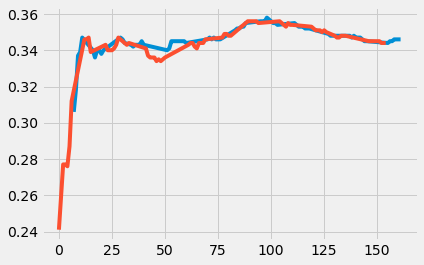

In [239]:
astros_away_obp.plot.line()
astros_home_obp.plot.line();

#### Is On Base Percentage (OBP) a rolling/weighted average? Can I parce HOME vs AWAY games? Should I consider a different stat like Strikeouts (SO)?

* ## SO advantage

In [193]:
astros_home_so = astros_home_gb.get_group(True).SO
astros_away_so = astros_home_gb.get_group(False).SO

In [249]:
yankees_home_so = yankees_home_gb.get_group(True).SO
yankees_away_so = yankees_home_gb.get_group(False).SO

In [253]:
astros_home_so_desc = astros_home_so.describe()

In [254]:
print(astros_home_so.mean())
print(yankees_home_so.mean())

6.197530864197531
8.407407407407407


In [255]:
print(astros_away_so.mean())
print(yankees_away_so.mean())

7.222222222222222
8.703703703703704


* ## SS/AT

In [257]:
astros_home_so-ab = astros_home_gb.get_group(True).so/ab
astros_away_so-ab = astros_home_gb.get_group(False).SO

SyntaxError: can't assign to operator (<ipython-input-257-094b584b0332>, line 1)

plotting describe

In [190]:
astros_home_db_desc = astros_home_gb.describe()

In [191]:
astros_home_db_desc.columns

MultiIndex([('Gtm', 'count'),
            ('Gtm',  'mean'),
            ('Gtm',   'std'),
            ('Gtm',   'min'),
            ('Gtm',   '25%'),
            ('Gtm',   '50%'),
            ('Gtm',   '75%'),
            ('Gtm',   'max'),
            ( 'PA', 'count'),
            ( 'PA',  'mean'),
            ...
            ('LOB',   '75%'),
            ('LOB',   'max'),
            (  '#', 'count'),
            (  '#',  'mean'),
            (  '#',   'std'),
            (  '#',   'min'),
            (  '#',   '25%'),
            (  '#',   '50%'),
            (  '#',   '75%'),
            (  '#',   'max')],
           length=200)